In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.tail()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
# Se divide la matriz del dataset en dos partes

X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especie)para todas las filas

In [16]:
#se aplica la transformacion de los datos para poder
#aplicar las propiedades de la distribucion normal
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [17]:
#para calcular  los auto-vectores y auto-valores
#mas conocido como eigenvector/eigenvalue

In [18]:
#se calcula una matriz la cual es de covarianza

print ('Matriz de coovarianza NumPy: \n%s' %np.cov(X_std.T)
      )


Matriz de coovarianza NumPy: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [19]:
#se calculan los auovalores y autovectores
#de la matriz y se muestra

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Auto vectores "Eigenvectors" \n%s' %eig_vecs)

print('\nAutoValores "Eigenvalues \n%s"' %eig_vals)






Auto vectores "Eigenvectors" 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

AutoValores "Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]"


In [20]:
#se hace una lista de parejas (Autoector , autovalor)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[: , i])
            
             for i in range (len(eig_vals))
            
            ]

#se ordenan los pares en orden descendiente 
#con la funcion sort "ordenamiento"

eig_pairs.sort(key=lambda x: x[0], reverse = True)


#se visualiza la lista de autovalores en el orden
#descendiente

print('Atovalores en modo onden descendiente: ')
for i in eig_pairs:
    print(i[0])



Atovalores en modo onden descendiente: 
2.9303537755893165
0.9274036215173405
0.14834222648163956
0.020746013995596283


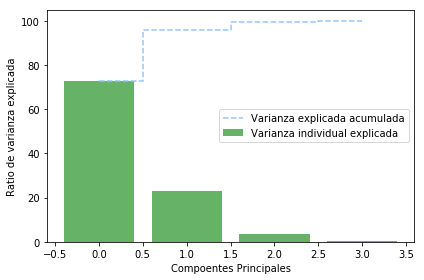

In [25]:
#a partir de estos autivalores,
#se calcula la varianza explicada

total = sum(eig_vals)
var_exp = [(i / total)*100
          for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

#se representa en una grafica de barras la varianza
#explicada por cada autovalor, y la acumulada

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize = (6,4))
    
    plt.bar(range(4) , var_exp, alpha= 0.6 ,
            align="center", 
           label = 'Varianza individual explicada', color =
            'g'
           )
    plt.step(range(4), cum_var_exp, where='mid', linestyle = '--',
            label = 'Varianza explicada acumulada')
    plt.ylabel('Ratio de varianza explicada')
    plt.xlabel('Compoentes Principales')
    plt.legend(loc = 'best')
    plt.tight_layout()
    
    
    



In [26]:

#se genera la matriz a partir de los pares
#autovalor-autovector

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                     eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)



Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


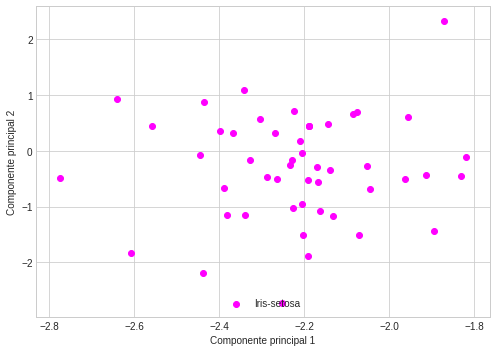

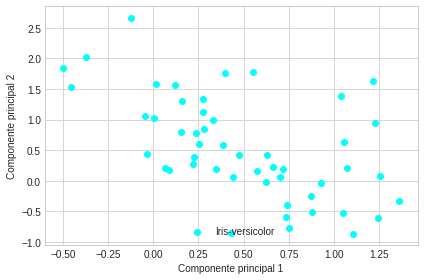

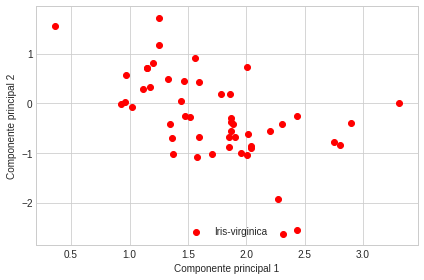

In [28]:
#por ultimo e representa en una grafica un nuevo espacio
#de datos con lo siguiente....

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7,5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor',
                         'Iris-virginica'),
                       ('magenta', 'cyan', 'red')):
        plt.scatter(Y[y==lab, 0],
                   Y[y==lab, 1],
                   label= lab,
                   c=col)
        plt.xlabel('Componente principal 1')
        plt.ylabel('Componente principal 2')
        plt.legend(loc='lower center')
        plt.tight_layout()
        plt.show()

